In [4]:
%matplotlib inline


import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets("MNIST_data", one_hot=True)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


In [9]:
def kl_divergence(p, p_hat, eps=1e-7):
    p_0 = tf.clip_by_value(p, eps, 1)
    p_1 = tf.clip_by_value(1 - p, eps, 1)
    p_hat_0 = tf.clip_by_value(p_hat, eps, 1)
    p_hat_1 = tf.clip_by_value(1 - p_hat, eps, 1)
    
    res = p_0 + (tf.log(p_0) - tf.log(p_hat_0)) + p_1 +(tf.log(p_1) - tf.log(p_hat_1))
    res = tf.reduce_mean(res)
    return res

In [10]:
with tf.Graph().as_default() as g:
    inputs = tf.placeholder(shape=[None, 784], dtype=tf.float32)
    hidden = tf.keras.layers.Dense(128, activation=tf.nn.relu)(inputs)
    output = tf.keras.layers.Dense(784, activation=tf.nn.sigmoid)(hidden)
    
    loss = tf.reduce_mean(tf.keras.losses.mean_squared_error(inputs,output))
    kld_loss = kl_divergence(0.10, hidden)  #ρ=0.10 为稀疏性参数
    total_loss = loss + kld_loss * 0.05  #β=0.05 
    
    optim = tf.train.MomentumOptimizer(learning_rate=0.01, momentum=0.9)
    train_op = optim.minimize(total_loss)

0.6247777


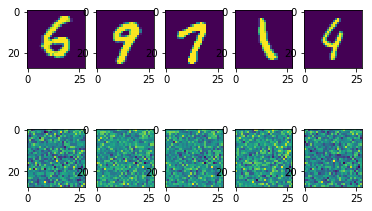

0.33252633


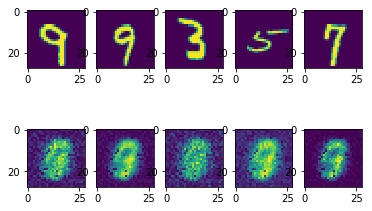

0.34717822


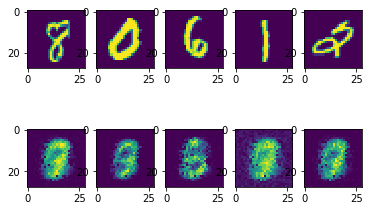

0.3735722


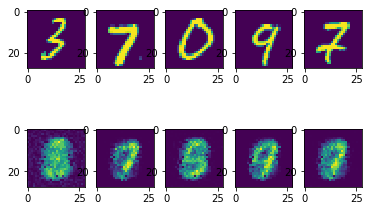

0.38988075


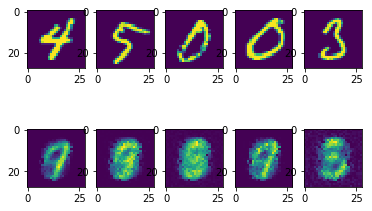

0.38447425


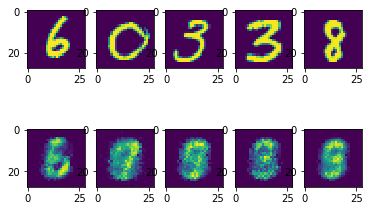

0.4009045


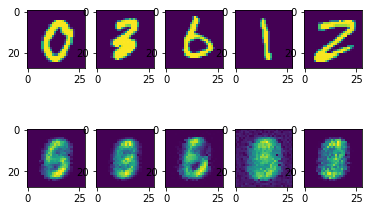

0.4021984


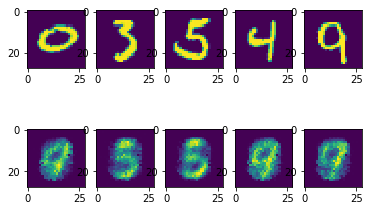

0.4018163


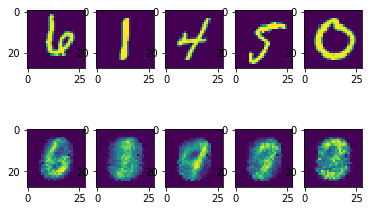

0.42538676


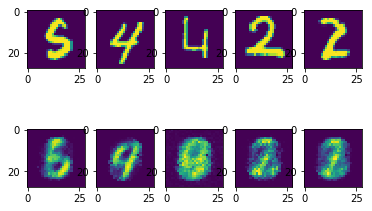

In [13]:
with tf.Session(graph=g) as sess:
    sess.run(tf.global_variables_initializer())
    
    for i in range(5000):
        batch_img, _ = mnist.train.next_batch(32) #返回img和label，label没有使用，就用_
        res_loss, _ = sess.run([total_loss, train_op],feed_dict={inputs: batch_img})
        
        if i % 500 == 0:
            print(res_loss)
            #可视化五张图片
            batch_img, _ = mnist.test.next_batch(5)
            res_out = sess.run(output, feed_dict={inputs: batch_img})
            for j in range(10):
                plt.subplot(2,5,j+1) #定义画布，2行5列
                img = batch_img[j] if j < 5 else res_out[j-5]
                img = plt.imshow((img * 255).astype(np.uint8).reshape(28,28))
            plt.show()

NameError: name 'inp_out' is not defined